In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the data
train_data = pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')

In [3]:
# Display the first five rows of train_data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Find the number of rows and columns for train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary Statistics for train_data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check number of null values for each attribute
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Drop all categorical features to explore continuous features
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True) 
train_data.drop('Sex', axis=1, inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data.drop('Embarked', axis=1, inplace=True)
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [8]:
# Explore continuous features 
train_data.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


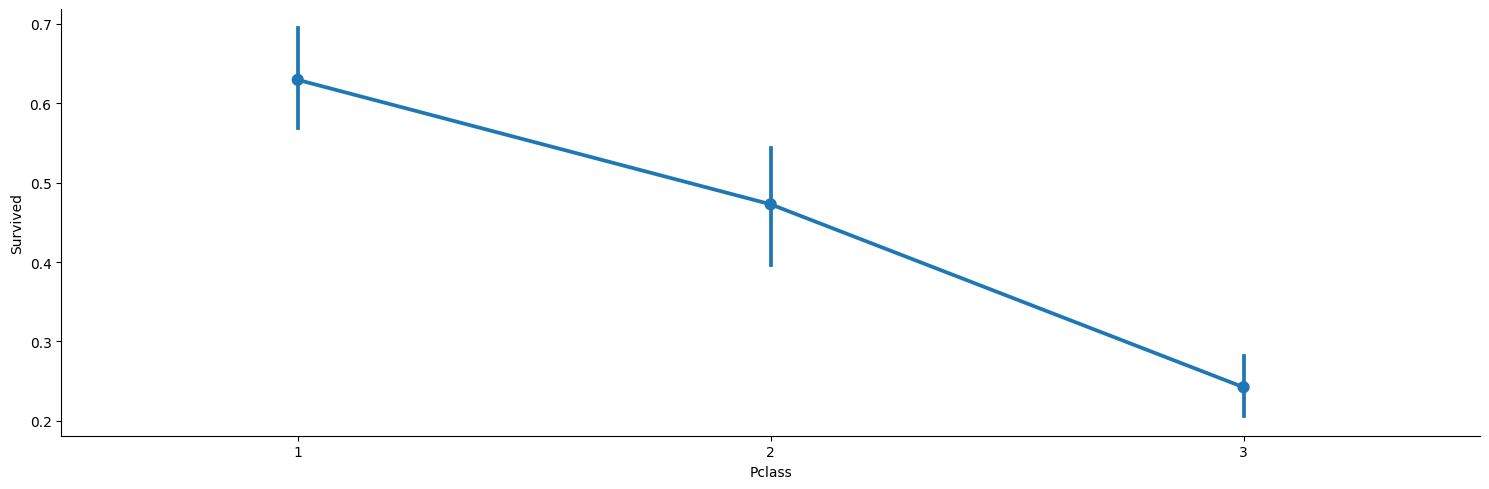

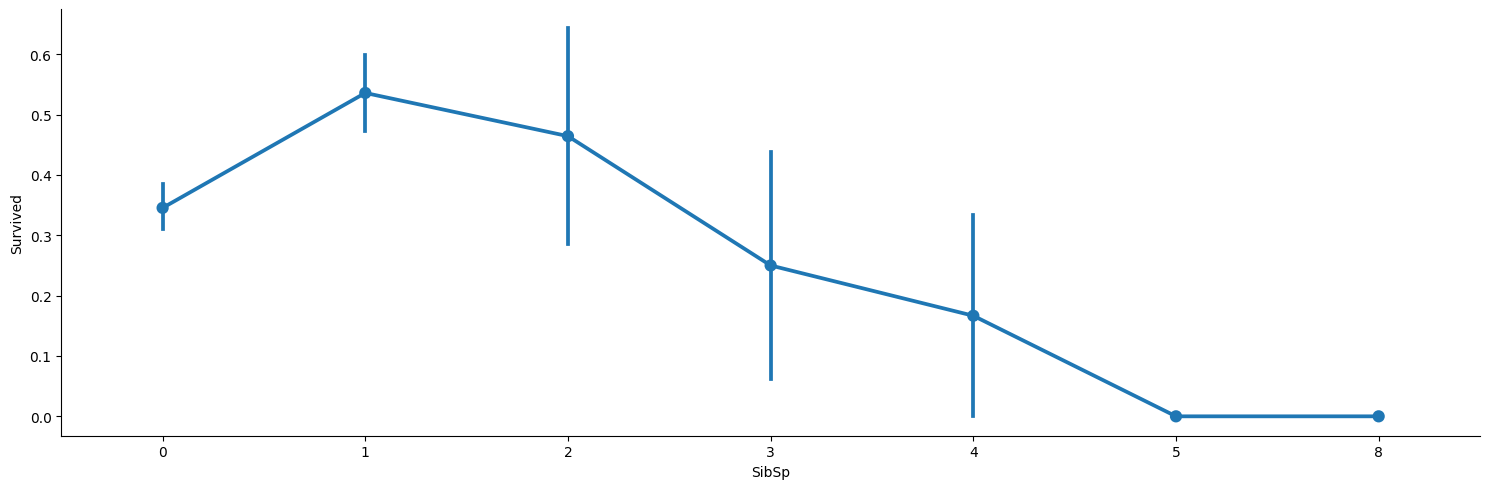

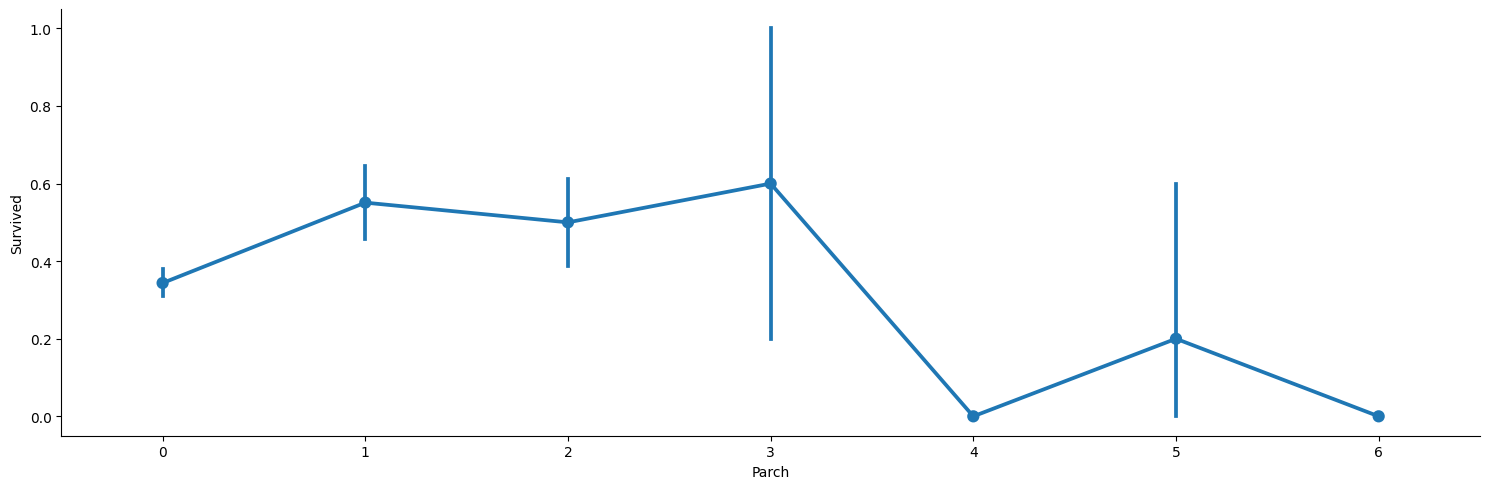

In [9]:
# Plot continuous features - Pclass, SibSp & Parch
sns.catplot(x='Pclass', y='Survived', data=train_data, kind='point', aspect=3)
sns.catplot(x='SibSp', y='Survived', data=train_data, kind='point', aspect=3)
sns.catplot(x='Parch', y='Survived', data=train_data, kind='point', aspect=3)

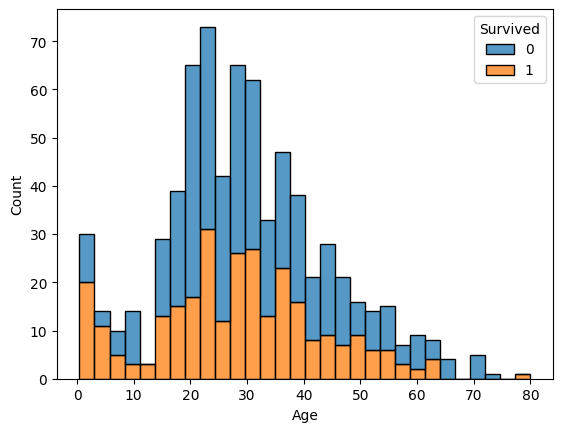

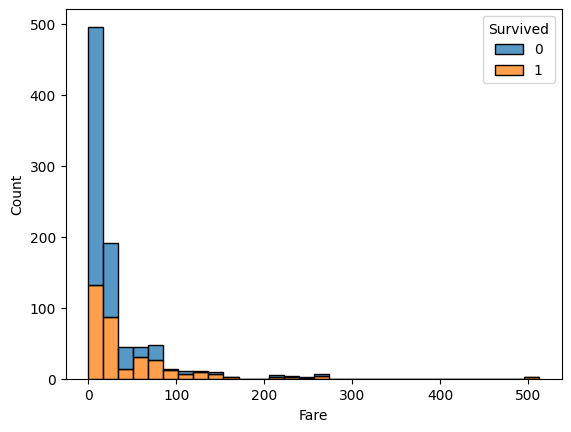

In [10]:
# Plot continuous features - Age & Fare
sns.histplot(x='Age', hue='Survived', data=train_data, multiple='stack', bins=30, kde=False)
plt.show()
sns.histplot(x='Fare', hue='Survived', data=train_data, multiple='stack', bins=30, kde=False)
plt.show()

In [11]:
# Data cleaning - continuous features
train_data=pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Fill missing age values with mean
age_mean = train_data['Age'].mean()
train_data['Age'].fillna(age_mean, inplace=True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [13]:
# Converting the cleaned continuous data to csv file
train_data.to_csv('trained_continuous_cleaned.csv', index=False)

In [14]:
# Drop all continuous features to explore categorical features along with PassengerId and Name
train_data=pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Pclass', axis=1, inplace=True) 
train_data.drop('Age', axis=1, inplace=True)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('Fare', axis=1, inplace=True)
train_data

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S
...,...,...,...,...,...
886,0,male,211536,NaN,S
887,1,female,112053,B42,S
888,0,female,W./C. 6607,NaN,S
889,1,male,111369,C148,C


In [15]:
# Find the number of rows and columns for train_data with null and non-null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [16]:
# Explore continuous features 
train_data.groupby(train_data['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [17]:
# Creating Cabin_ind attribute to convert Cabin values into numerical values
train_data['Cabin_ind'] = np.where(train_data['Cabin'].isnull(), 0, 1)
train_data.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


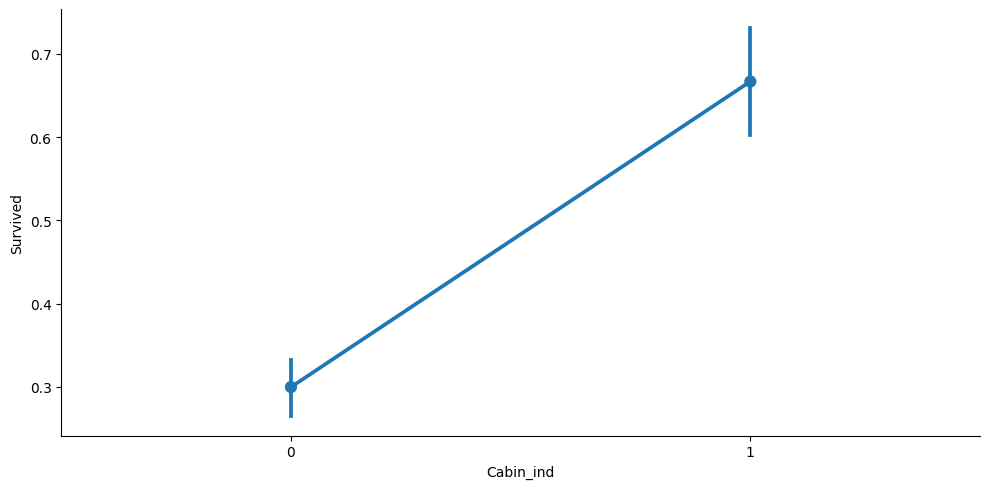

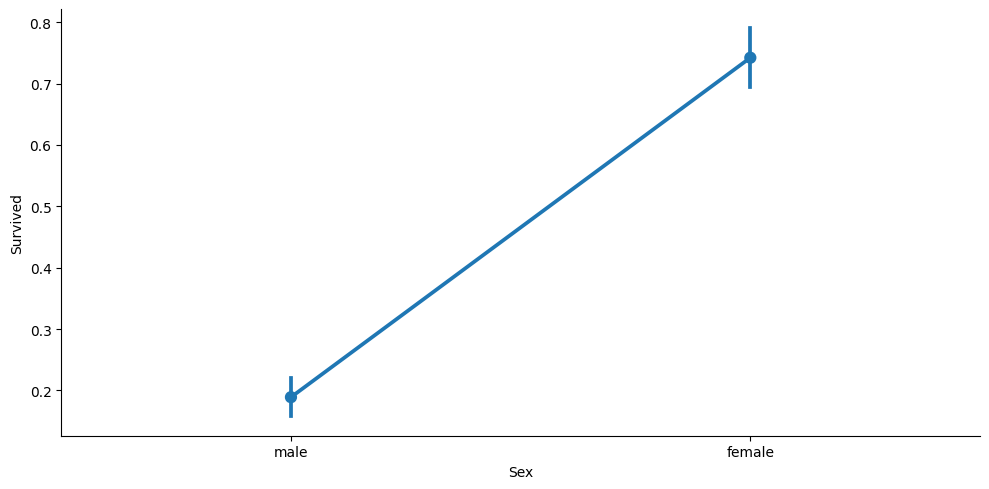

In [18]:
# Plot categorical features - Cabin_ind & Sex
sns.catplot(x='Cabin_ind', y='Survived', data=train_data, kind='point', aspect=2)
sns.catplot(x='Sex', y='Survived', data=train_data, kind='point', aspect=2)

In [19]:
# Data cleaning - categorical features
train_data=pd.read_csv('/kaggle/working/trained_continuous_cleaned.csv')
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [20]:
# Creating Cabin_ind attribute to convert Cabin values into numerical values
train_data['Cabin_ind'] = np.where(train_data['Cabin'].isnull(), 0, 1)

In [21]:
# Converting sex values into numerical values
gender_num = {'male': 0, 'female': 1}

train_data['Sex'] = train_data['Sex'].map(gender_num)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
# Dropping unnecessary variables
train_data.drop(['Cabin', 'Embarked', 'Ticket', 'Name'], axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,0
5,0,3,0,29.699118,0,0,8.4583,0
6,0,1,0,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,0
8,1,3,1,27.000000,0,2,11.1333,0
9,1,2,1,14.000000,1,0,30.0708,0


In [23]:
# Converting the cleaned data to csv file
train_data.to_csv('/kaggle/working/trained_cleaned.csv', index=False)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,1
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [24]:
# Splitting the train_data into train, validation, and test sets
input_features = train_data.drop('Survived', axis=1)
pred_labels = train_data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(input_features, pred_labels, test_size = 0.3, random_state = 1234) 
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 1234)

In [25]:
# Print the train_data into train, validation, and test sets
print(len(X_train))
print(len(X_val))
print(len(X_test))
print(len(Y_train))
print(len(Y_val))
print(len(Y_test))

623
134
134
623
134
134


In [26]:
# Converting the train, validation, and test sets to csv file
X_train.to_csv('/kaggle/working/X_train_features.csv', index=False)
X_val.to_csv('/kaggle/working/X_val_features.csv', index=False)
X_test.to_csv('/kaggle/working/X_test_features.csv', index=False)

Y_train.to_csv('/kaggle/working/Y_train_features.csv', index=False)
Y_val.to_csv('/kaggle/working/Y_val_features.csv', index=False)
Y_test.to_csv('/kaggle/working/Y_test_features.csv', index=False)

In [27]:
# X_train and Y_train features
input_features = pd.read_csv('/kaggle/working/X_train_features.csv')
pred_labels = pd.read_csv('/kaggle/working/Y_train_features.csv')

In [28]:
# Creating different models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
support_vector_machine = SVC()
multi_layer_perceptron = MLPClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
naive_bayes = MultinomialNB()

In [29]:
# Check the parameters for each model
for i in [linear_regression, logistic_regression, support_vector_machine, multi_layer_perceptron, random_forest, gradient_boosting, naive_bayes]:
    params = i.get_params()
    print(i,params)
    print("\n")

LinearRegression() {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


LogisticRegression() {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


SVC() {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


MLPClassifier() {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10,

In [30]:
# Define the hyperparameters for each model
lr_parameters = {
    'fit_intercept': [True, False],
}
lo_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
svm_parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
mlp_parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}
rf_parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}
gb_parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}
nb_parameters = {
    'alpha': [0.1, 0.5, 1.0]
}

In [31]:
# Create GridSearchCV for each model
lr_cv = GridSearchCV(linear_regression, lr_parameters, cv=5)
lo_cv = GridSearchCV(logistic_regression, lo_parameters, cv=5)
svm_cv = GridSearchCV(support_vector_machine, svm_parameters, cv=5)
mlp_cv = GridSearchCV(multi_layer_perceptron, mlp_parameters, cv=5)
rf_cv = GridSearchCV(random_forest, rf_parameters, cv=5)
gb_cv = GridSearchCV(gradient_boosting, gb_parameters, cv=5)
nb_cv = GridSearchCV(naive_bayes, nb_parameters, cv=5)

In [32]:
# Fit each model to the data
lr_cv.fit(input_features, pred_labels)
lo_cv.fit(input_features, pred_labels.values.ravel())
svm_cv.fit(input_features, pred_labels.values.ravel())
mlp_cv.fit(input_features, pred_labels.values.ravel())
rf_cv.fit(input_features, pred_labels.values.ravel())
gb_cv.fit(input_features, pred_labels.values.ravel())
nb_cv.fit(input_features, pred_labels.values.ravel())

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]})

In [33]:
# Print the best hyperparameters for each model
lr_best_params = lr_cv.best_params_
print("Best Hyperparameters for Linear Regression:", lr_best_params)
print("\n")
lo_best_params = lo_cv.best_params_
print("Best Hyperparameters for Logistic Regression:", lo_best_params)
print("\n")
svm_best_params = svm_cv.best_params_
print("Best Hyperparameters for Support vector Machine:", svm_best_params)
print("\n")
mlp_best_params = mlp_cv.best_params_
print("Best Hyperparameters for Multi Layer Perceptron:", mlp_best_params)
print("\n")
rf_best_params = rf_cv.best_params_
print("Best Hyperparameters for Random Forest:", rf_best_params)
print("\n")
gb_best_params = gb_cv.best_params_
print("Best Hyperparameters for Gradient Boosting:", gb_best_params)
print("\n")
nb_best_params = nb_cv.best_params_
print("Best Hyperparameters for Naive Bayes:", nb_best_params)
print("\n")

Best Hyperparameters for Linear Regression: {'fit_intercept': True}


Best Hyperparameters for Logistic Regression: {'C': 100}


Best Hyperparameters for Support vector Machine: {'C': 10, 'kernel': 'linear'}


Best Hyperparameters for Multi Layer Perceptron: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}


Best Hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


Best Hyperparameters for Naive Bayes: {'alpha': 0.1}




In [34]:
# Access the best model
lr_best_model = lr_cv.best_estimator_
lo_best_model = lo_cv.best_estimator_
svm_best_model = svm_cv.best_estimator_
mlp_best_model = mlp_cv.best_estimator_
rf_best_model = rf_cv.best_estimator_
gb_best_model = gb_cv.best_estimator_
nb_best_model = nb_cv.best_estimator_

In [35]:
# Perform 5-fold cross-validation with the best model
lr_cv_scores = cross_val_score(lr_best_model, input_features, pred_labels, cv=5, scoring='accuracy')
lo_cv_scores = cross_val_score(lo_best_model, input_features, pred_labels, cv=5, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_best_model, input_features, pred_labels, cv=5, scoring='accuracy')
mlp_cv_scores = cross_val_score(mlp_best_model, input_features, pred_labels, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_best_model, input_features, pred_labels, cv=5, scoring='accuracy')
gb_cv_scores = cross_val_score(gb_best_model, input_features, pred_labels, cv=5, scoring='accuracy')
nb_cv_scores = cross_val_score(nb_best_model, input_features, pred_labels, cv=5, scoring='accuracy')

In [36]:
# Print cv_scores
print(lr_cv_scores)
print(lo_cv_scores)
print(svm_cv_scores)
print(mlp_cv_scores)
print(rf_cv_scores)
print(gb_cv_scores)
print(nb_cv_scores)

[nan nan nan nan nan]
[0.752      0.808      0.84       0.75       0.76612903]
[0.76       0.784      0.768      0.76612903 0.82258065]
[0.776      0.792      0.84       0.75806452 0.76612903]
[0.8        0.816      0.848      0.7983871  0.80645161]
[0.824      0.8        0.864      0.81451613 0.83064516]
[0.696      0.728      0.784      0.67741935 0.68548387]


In [37]:
# Model prediction
lr_val = lr_best_model.predict(X_val)
lo_val = lo_best_model.predict(X_val)
svm_val = svm_best_model.predict(X_val)
mlp_val = mlp_best_model.predict(X_val)
rf_val = rf_best_model.predict(X_val)
gb_val = gb_best_model.predict(X_val)
nb_val = nb_best_model.predict(X_val)

In [38]:
# Validation Accuracy for each model

"""lr_accuracy = accuracy_score(Y_val, lr_val)
print("Validation Accuracy for Linear Regression:", lr_accuracy)"""

lo_accuracy = accuracy_score(Y_val, lo_val)
print("Validation Accuracy for Logistic Regression:", lo_accuracy)
svm_accuracy = accuracy_score(Y_val, svm_val)
print("Validation Accuracy for Support Vector Machine:", svm_accuracy)
mlp_accuracy = accuracy_score(Y_val, mlp_val)
print("Validation Accuracy for Multi Layer Perceptron:", mlp_accuracy)
rf_accuracy = accuracy_score(Y_val, rf_val)
print("Validation Accuracy for Random Forest:", rf_accuracy)
gb_accuracy = accuracy_score(Y_val, gb_val)
print("Validation Accuracy for Gradient Boosting:", gb_accuracy)
nb_accuracy = accuracy_score(Y_val, nb_val)
print("Validation Accuracy for Naive Bayes:", nb_accuracy)

Validation Accuracy for Logistic Regression: 0.8805970149253731
Validation Accuracy for Support Vector Machine: 0.8507462686567164
Validation Accuracy for Multi Layer Perceptron: 0.8432835820895522
Validation Accuracy for Random Forest: 0.8432835820895522
Validation Accuracy for Gradient Boosting: 0.8283582089552238
Validation Accuracy for Naive Bayes: 0.664179104477612


In [39]:
# Validation Precision for each model

"""lr_precision = precision_score(Y_val, lr_val)
print("Mean Squared Error:", lr_precision)"""

lo_precision = precision_score(Y_val, lo_val)
print("Validation Precision for Logistic Regression:", lo_precision)
svm_precision = precision_score(Y_val, svm_val)
print("Validation Precision for Support Vector Machine:", svm_precision)
mlp_precision = precision_score(Y_val, mlp_val)
print("Validation Precision for Multi Layer Perceptron:", mlp_precision)
rf_precision = precision_score(Y_val, rf_val)
print("Validation Precision for Random Forest:", rf_precision)
gb_precision = precision_score(Y_val, gb_val)
print("Validation Precision for Gradient Boosting:", gb_precision)
nb_precision = precision_score(Y_val, nb_val)
print("Validation Precision for Naive Bayes:", nb_precision)

Validation Precision for Logistic Regression: 0.84
Validation Precision for Support Vector Machine: 0.8409090909090909
Validation Precision for Multi Layer Perceptron: 0.7636363636363637
Validation Precision for Random Forest: 0.8085106382978723
Validation Precision for Gradient Boosting: 0.8857142857142857
Validation Precision for Naive Bayes: 0.5641025641025641


In [40]:
# Validation Recall for each model

"""lr_recall = recall_score(Y_val, lr_val)
print("Mean Squared Error:", lr_recall)"""

lo_recall = recall_score(Y_val, lo_val)
print("Validation Recall for Logistic Regression:", lo_recall)
svm_recall = recall_score(Y_val, svm_val)
print("Validation Recall for Support Vector Machine:", svm_recall)
mlp_recall = recall_score(Y_val, mlp_val)
print("Validation Recall for Multi Layer Perceptron:", mlp_recall)
rf_recall = recall_score(Y_val, rf_val)
print("Validation Recall for Random Forest:", rf_recall)
gb_recall = recall_score(Y_val, gb_val)
print("Validation Recall for Gradient Boosting:", gb_recall)
nb_recall = recall_score(Y_val, nb_val)
print("Validation Recall for Naive Bayes:", nb_recall)

Validation Recall for Logistic Regression: 0.84
Validation Recall for Support Vector Machine: 0.74
Validation Recall for Multi Layer Perceptron: 0.84
Validation Recall for Random Forest: 0.76
Validation Recall for Gradient Boosting: 0.62
Validation Recall for Naive Bayes: 0.44


In [41]:
# Prediction for best model
final_model = lo_best_model.predict(X_test)

In [42]:
# Accuracy, precision and recall scores for the best model - lo
test_accuracy = accuracy_score(Y_test, final_model)
print("Test Accuracy for Logistic Regression:", test_accuracy)
test_precision = precision_score(Y_test, final_model)
print("Test Precision for Logistic Regression:", lo_precision)
test_recall = recall_score(Y_test, final_model)
print("Test Recall for Logistic Regression:", lo_recall)

Test Accuracy for Logistic Regression: 0.7985074626865671
Test Precision for Logistic Regression: 0.84
Test Recall for Logistic Regression: 0.84


In [43]:
# Use joblib to write the pickled out model
joblib.dump(lr_cv.best_estimator_, 'lr_model.pkl')
joblib.dump(lo_cv.best_estimator_, 'best_model_lo_model.pkl')
joblib.dump(svm_cv.best_estimator_, 'svm_model.pkl')
joblib.dump(mlp_cv.best_estimator_, 'mlp_model.pkl')
joblib.dump(rf_cv.best_estimator_, 'rf_model.pkl')
joblib.dump(gb_cv.best_estimator_, 'gb_model.pkl')
joblib.dump(nb_cv.best_estimator_, 'nb_model.pkl')

['nb_model.pkl']